Membuat Dataset dengan nama "data_penjualan_latihan.csv"

In [ ]:
import pandas as pd

# Buat data penjualan toko
data = {
    "Tanggal": ["2025-02-01", "2025-02-02", "2025-02-03", "2025-02-04", "2025-02-05", "2025-02-06", "2025-02-07", "2025-02-08", "2025-02-09", "2025-02-10",
                "2025-02-11", "2025-02-12", "2025-02-13", "2025-02-14", "2025-02-15", "2025-02-16", "2025-02-17", "2025-02-18", "2025-02-19", "2025-02-20",
                "2025-02-21", "2025-02-22", "2025-02-23", "2025-02-24", "2025-02-25", "2025-02-26", "2025-02-27", "2025-02-28", "2025-03-01", "2025-03-02",
                "2025-03-03", "2025-03-04", "2025-03-05", "2025-03-06", "2025-03-07", "2025-03-08", "2025-03-09", "2025-03-10", "2025-03-11", "2025-03-12",
                "2025-03-13", "2025-03-14", "2025-03-15", "2025-03-16", "2025-03-17", "2025-03-18", "2025-03-19", "2025-03-20", "2025-03-21", "2025-03-22"],
    "Produk": ["Minyak Goreng", "Beras", "Gula", "Tepung", "Mie Instan", "Susu", "Kopi", "Teh", "Sirup", "Daging Ayam"] * 5,
    "Jumlah Terjual": [10, 5, 7, 3, 12, 8, 18, 10, 8, 14] * 5,
    "stok": [20, 15, 8, 12, 25, 10, 25, 15, 17, 10] * 5,
    "Harga Satuan": [15000, 12000, 13000, 11000, 3000, 18000, 8000, 5000, 12000, 30000] * 5
}

# Simpan dalam DataFrame
df = pd.DataFrame(data)

# Simpan sebagai file CSV
df.to_csv("data_penjualan_latihan.csv", index=False)

print("File CSV berhasil dibuat dan disimpan sebagai 'data_penjualan_latihan.csv'!")

File CSV berhasil dibuat dan disimpan sebagai 'data_penjualan_latihan.csv'!


Membaca dan menampilkan seluruh data dalam Dataset penjualan

In [ ]:
# Membaca file csv
df = pd.read_csv("data_penjualan_latihan.csv")

# Menampilkan seluruh data penjualan
print(df.head(50))

       Tanggal         Produk  Jumlah Terjual  stok  Harga Satuan
0   2025-02-01  Minyak Goreng              10    20         15000
1   2025-02-02          Beras               5    15         12000
2   2025-02-03           Gula               7     8         13000
3   2025-02-04         Tepung               3    12         11000
4   2025-02-05     Mie Instan              12    25          3000
5   2025-02-06           Susu               8    10         18000
6   2025-02-07           Kopi              18    25          8000
7   2025-02-08            Teh              10    15          5000
8   2025-02-09          Sirup               8    17         12000
9   2025-02-10    Daging Ayam              14    10         30000
10  2025-02-11  Minyak Goreng              10    20         15000
11  2025-02-12          Beras               5    15         12000
12  2025-02-13           Gula               7     8         13000
13  2025-02-14         Tepung               3    12         11000
14  2025-0

Mengecek data yang kosong, menambahkan kolom "total penjualan" dan kolom "keuntungan", mengatur tampilan agar tampilan tidak terpotong kebawah dan menampilkan hasil transformasi

In [ ]:
# Cek apakah ada data kosong
print(df.isnull().sum())

# Konversi kolom "Tanggal" ke format datetime
df["Tanggal"] = pd.to_datetime(df["Tanggal"])

# Tambahkan kolom "total penjualan"
df["Total Penjualan"] = df["Jumlah Terjual"] * df["Harga Satuan"]

# Tambahkan kolom "keuntungan" (asumsi modal 10.000 per produk)
df["Keuntungan"] = df["Total Penjualan"] - (df["Jumlah Terjual"] * 10000)

# Mengatur tampilan agar tidak terpotong ke bawah
pd.set_option('display.expand_frame_repr', False)

# Menampilkan hasil transformasi
print(df.head(50))

Tanggal           0
Produk            0
Jumlah Terjual    0
stok              0
Harga Satuan      0
dtype: int64
      Tanggal         Produk  Jumlah Terjual  stok  Harga Satuan  Total Penjualan  Keuntungan
0  2025-02-01  Minyak Goreng              10    20         15000           150000       50000
1  2025-02-02          Beras               5    15         12000            60000       10000
2  2025-02-03           Gula               7     8         13000            91000       21000
3  2025-02-04         Tepung               3    12         11000            33000        3000
4  2025-02-05     Mie Instan              12    25          3000            36000      -84000
5  2025-02-06           Susu               8    10         18000           144000       64000
6  2025-02-07           Kopi              18    25          8000           144000      -36000
7  2025-02-08            Teh              10    15          5000            50000      -50000
8  2025-02-09          Sirup             

Installasi scikit-learn

In [ ]:
!pip install scikit-learn

Melatih Model AI (Train & Execute) menggunakan  Decision Tree Classifier dengan accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Pilih fitur (X) dan target (y)
X = df[["Jumlah Terjual", "stok"]]
y = (df["stok"] < 5).astype (int) # 1 jika stok kurang dari 5, 0 jika cukup

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
print("Akurasi Model: ", accuracy_score (y_test, y_pred))

Akurasi Model:  1.0


 Prediksi Restock Produk (Execute & Insights) dimana hasil prediksi menunjukkan bahwa Produk perlu di-restock karena prediksi [0] == 0

In [ ]:
# Contoh produk baru (jumlah terjual 8, stok tersisa 3)
produk_baru = [[8, 3]]
prediksi = model.predict(produk_baru)

if prediksi[0] == 0:
    print("Produk perlu di-restock!")
else:
    print("Stok masih cukup.")

Produk perlu di-restock!


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Visual Output Grafik scatter plot antara Jumlah Terjual dan Stok, dengan warna
berdasarkan keuntungan.

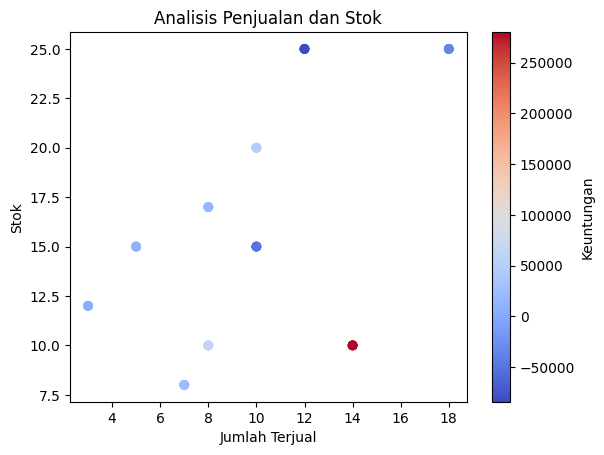

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df ["Jumlah Terjual"], df["stok"], c=df["Keuntungan"], cmap="coolwarm")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Stok")
plt.title("Analisis Penjualan dan Stok")
plt.colorbar (label="Keuntungan")
plt.show()